# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Aurellia Antonie]
- **Email:** [aurellia0712@gmail.com]
- **ID Dicoding:** [aurellia_antonie]

## Menentukan Pertanyaan Bisnis

- Bagaimana season dapat mempengaruhi performa pengguna cnt dalam beberapa bulan terakhir?
- Bagaimana demografi pengguna yang kita miliki?
- Pengguna apa yang paling banyak dan paling sedikit masuk di indeks record?
- Seberapa sering seorang pengguna melakukan rental dalam beberapa bulan terakhir?
- Berapa banyak pengguna yang termasuk dalam cnd dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load data day_df

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load data hour_df

In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dapat dilihat bahwa data day.csv dapat dimuat dan dibaca oleh program
- Dapat dilihat juga bahwa data hour.csv dapat dimuat dan dibaca oleh program

### Assessing Data

Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data day.csv terdapat kesalahan tipe data untuk kolom dteday, terdapat innacurate value pada kolom weathersit. Dan tidak ada missing value dan data yang terduplikat pada data day.csv
- Pada data hour.csv terdapat kesalahan tipe data untuk kolom dteday, tidak ada missing value, innacurate value dan data yang terduplikat pada data hour.csv

# Cleaning data

Membersihkan data day_df

Menangani innacurate value

In [11]:
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


In [12]:
day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1145370658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)


In [13]:
day_df[day_df.weathersit == day_df.weathersit.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,4,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,4,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,4,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,4,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,4,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,4,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,4,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,4,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,4,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,4,0.254167,0.227913,0.882500,0.351371,57,570,627


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.424077,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.645889,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengganti tipe data

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan data hour_df

Mengganti tipe data

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada data day.csv dapat dilihat pada kolom weathersit bahwa nilai max berubah menjadi 4 dan min adalah 1. dan nilai std juga ikut berubah. Serta tipe data di kolom dteday sudah menjadi datetime
- Pada data hour.csv dapat dilihat bahwa tipe data di kolom dteday sudah menjadi datetime

## Exploratory Data Analysis (EDA)

### Eksplorasi data day_df

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.424077,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.645889,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


dari data diatas dapat dilihat bahwa selama 731 hari, kostumer sering melakukan bike-sharing rental pada cuaca 1 dengan rata-rata 1.424077 dan standar daviasi sebesar 0.645889. Dari informasi tersebut dapat memberikan gambaran bahwa segmentasi bike-sharing rental selama 731 hari dilakukan pada cuaca yang cerah, sedikit berawan, dan berawan sebagian.

In [19]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "weathersit": ["max", "min", "mean", "std"]
})

instant weathersit                        
       nunique        max min      mean       std
season                                           
1          181          4   1  1.430939  0.616382
2          184          4   1  1.418478  0.585700
3          188          4   1  1.319149  0.588895
4          178          4   1  1.533708  0.767628

In [20]:
day_df.groupby(by="cnt").instant.nunique().sort_values(ascending=False)

cnt
4401    2
4459    2
5260    2
4073    2
5698    2
       ..
3761    1
3767    1
3777    1
3785    1
8714    1
Name: instant, Length: 696, dtype: int64

# Eksplorasi data hour_df

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


dari data diatas dapat dilihat bahwa selama 17379 jam, kostumer sering melakukan bike-sharing rental pada cuaca 2 dengan mean 2.501640 dan standar daviasi sebesar 1.106918. Dan kegiatan bike-sharing rental sering dilakukan pada jam 11-12 siang dengan mean 11.546752 dan standar deviasi sebesar 6.914405 Dari informasi tersebut dapat memberikan gambaran bahwa segmentasi bike-sharing rental selama 17379 jam lebih banyak dilakukan pada siang hari.

In [22]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "weathersit": ["max", "min", "mean", "std"]
})

instant weathersit                        
       nunique        max min      mean       std
season                                           
1         4242          4   1  1.460160  0.653247
2         4409          3   1  1.443638  0.656574
3         4496          3   1  1.330294  0.583899
4         4232          3   1  1.472117  0.653104

In [23]:
hour_df.groupby(by="cnt").instant.nunique().sort_values(ascending=False)

cnt
5      260
6      236
4      231
3      224
2      208
      ... 
714      1
630      1
717      1
806      1
977      1
Name: instant, Length: 869, dtype: int64

# Eksplorasi data day_df dan hour_df

In [24]:
hours_days_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
hours_days_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [25]:
hours_days_df.describe(include="all")

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,2.997264,0.683995,1.424077,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,4.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.004787,0.465233,0.645889,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Memeriksa missing value

In [26]:
hours_days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday_x      17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  int64         
 8   workingday_x  17379 non-null  int64         
 9   weathersit_x  17379 non-null  int64         
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

In [27]:
hours_days_df.isna().sum()

instant             0
dteday_x            0
season_x            0
yr_x                0
mnth_x              0
hr                  0
holiday_x           0
weekday_x           0
workingday_x        0
weathersit_x        0
temp_x              0
atemp_x             0
hum_x               0
windspeed_x         0
casual_x            0
registered_x        0
cnt_x               0
dteday_y        16648
season_y        16648
yr_y            16648
mnth_y          16648
holiday_y       16648
weekday_y       16648
workingday_y    16648
weathersit_y    16648
temp_y          16648
atemp_y         16648
hum_y           16648
windspeed_y     16648
casual_y        16648
registered_y    16648
cnt_y           16648
dtype: int64

jumlah indeks rekaman berdasarkan cnt

In [28]:
hours_days_df.groupby(by="cnt_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,cnt_x,instant
0,5,260
1,6,236
2,4,231
3,3,224
4,2,208
5,7,198
6,8,182
7,1,158
8,10,155
9,11,147


In [29]:
hours_days_df.groupby(by="cnt_y").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,cnt_y,instant
0,4401.0,2
1,4459.0,2
2,5260.0,2
3,4073.0,2
4,5698.0,2
5,1162.0,2
6,4098.0,2
7,4758.0,2
8,6824.0,2
9,5312.0,2


Jumlah pengguna berdasarkan season

In [30]:
hours_days_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False)

season_x
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

In [31]:
hours_days_df.groupby(by="season_y").instant.nunique().sort_values(ascending=False)

season_y
3.0    188
2.0    184
1.0    181
4.0    178
Name: instant, dtype: int64

Jumlah pengguna berdasarkan weathersit

In [32]:
hours_days_df.groupby(by="weathersit_x").instant.nunique().sort_values(ascending=False)

weathersit_x
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [33]:
hours_days_df.groupby(by="weathersit_y").instant.nunique().sort_values(ascending=False)

weathersit_y
1.0    463
2.0    247
4.0     21
Name: instant, dtype: int64

**Insight:**
Pada penggabungan data day.csv dan hour.csv terdapat dua output yaitu kolom_x dan kolom_y
- pada kolom_x diketahui bahwa data ini berasal dari hour_df. Pada data weathersit_x pengguna paling banyak melakukan rental pada weathersit 1. Dan untuk season_x pengguna paling banyak melakukan rental pada season 3.
- pada kolom_y diketahui bahwa data ini berasal dari day_df. Pada data weathersit_y tidak ada pengguna yang melakukan rental sepeda pada weathersit 3. Dan pada season_y pengguna paling banyak melakukan rental pada season 3

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana season dapat mempengaruhi performa pengguna cnt dalam beberapa bulan terakhir?

In [34]:
season_day_df = hours_days_df.resample(rule='M', on='dteday_x').agg({
    "season_x": "nunique",
    "cnt_x": "sum"
})
season_day_df.index = season_day_df.index.strftime('%Y-%m')
season_day_df = season_day_df.reset_index()
season_day_df.rename(columns={
    "season_x": "instant",
    "cnt_x": "revenue"
}, inplace=True)
season_day_df.head()

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\506750664.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  season_day_df = hours_days_df.resample(rule='M', on='dteday_x').agg({


,dteday_x,instant,revenue
0,2011-01,1,38189
1,2011-02,1,48215
2,2011-03,2,64045
3,2011-04,1,94870
4,2011-05,1,135821


In [35]:
season_day_df = hours_days_df.resample(rule='M', on='dteday_y').agg({
    "season_y": "nunique",
    "cnt_y": "sum"
})
season_day_df.index = season_day_df.index.strftime('%Y-%m')
season_day_df = season_day_df.reset_index()
season_day_df.rename(columns={
    "season_y": "instant",
    "cnt_y": "revenue"
}, inplace=True)
season_day_df.head()

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\628043635.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  season_day_df = hours_days_df.resample(rule='M', on='dteday_y').agg({


,dteday_y,instant,revenue
0,2011-01,1,38189.0
1,2011-02,1,48215.0
2,2011-03,2,64045.0
3,2011-04,1,94870.0
4,2011-05,1,135821.0


C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2657189914.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  season_day_df = hours_days_df.resample(rule='M', on='dteday_x').agg({


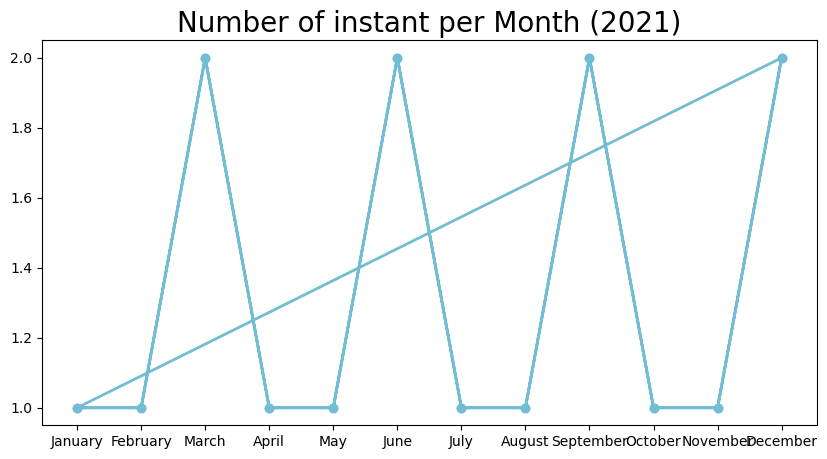

In [36]:
season_day_df = hours_days_df.resample(rule='M', on='dteday_x').agg({
    "season_x": "nunique",
    "cnt_x": "sum"
})
season_day_df.index = season_day_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

season_day_df = season_day_df.reset_index()
season_day_df.rename(columns={
    "season_x": "instant",
    "cnt_x": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(season_day_df["dteday_x"], season_day_df["instant"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of instant per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\313273273.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  season_day_df = hours_days_df.resample(rule='M', on='dteday_y').agg({


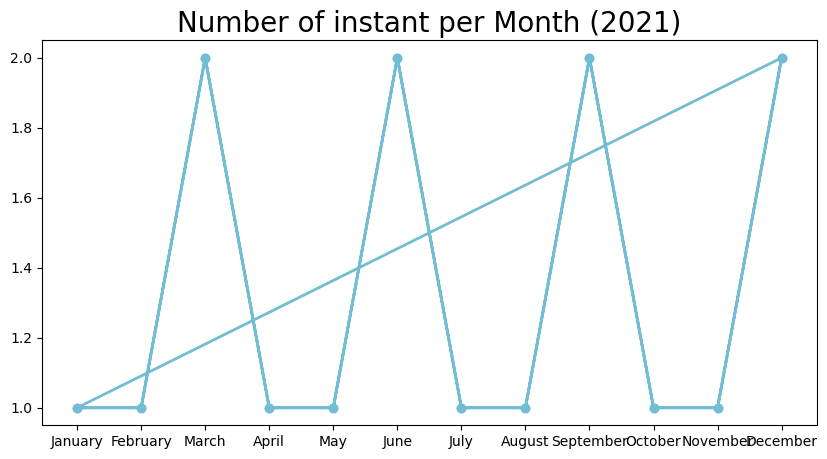

In [37]:
season_day_df = hours_days_df.resample(rule='M', on='dteday_y').agg({
    "season_y": "nunique",
    "cnt_y": "sum"
})
season_day_df.index = season_day_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

season_day_df = season_day_df.reset_index()
season_day_df.rename(columns={
    "season_y": "instant",
    "cnt_y": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(season_day_df["dteday_y"], season_day_df["instant"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of instant per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari kedua line chart tersebut terlihat tidak ada perbedaan antara keduanya karena data day.csv dan hour.csv sudah digabungkan sehingga ntara kolom_x dan kolom_y tidak ada perbedaan. kemudian dari linechart tersebut dapat dilihat bahwa bahwa pada bulan maret, juni, september, dan desember terjadi kenaikan, dan pada bulan april, juli, dan oktober terjadi penurunan pada pengguna berdasarkan pengaruh cnt dan season.

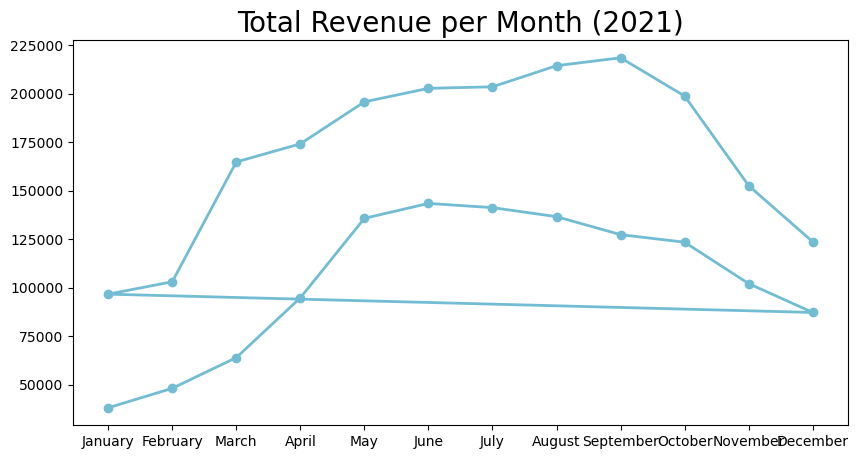

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(
    season_day_df["dteday_y"],
    season_day_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penurunan jumlah pengguna cnt yang terjadi pada bulan oktober, november, dan desember dapat berdampak terhadap penurunan revenue perusahaan bike-sharing rental. Sehingga kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal.

### Pertanyaan 2: Bagaimana demografi pengguna yang kita miliki?

Berdasarkan season

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1158139483.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1158139483.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


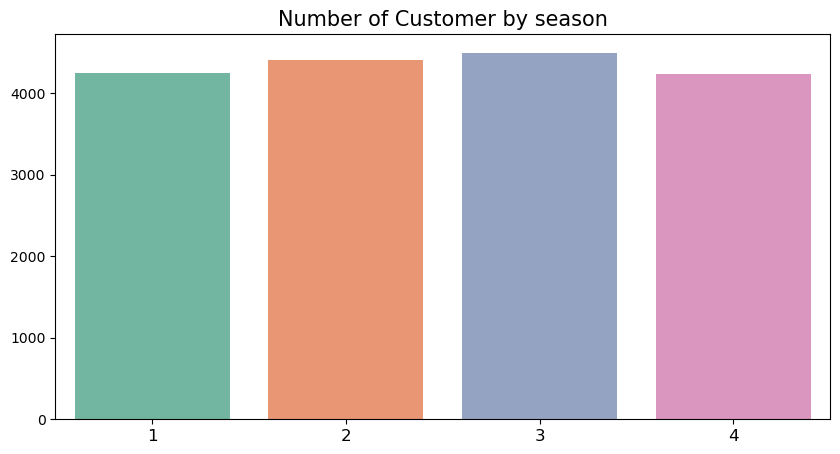

In [39]:
colors = sns.color_palette("Set2")
byseason_df = hours_days_df.groupby(by="season_x").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="season_x",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna yang paling banyak pada kolom season_x terjadi pada season 3 yaitu pada musim gugur. dan pengguna terendah pada season 4 yaitu pada musim salju

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2556430609.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2556430609.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


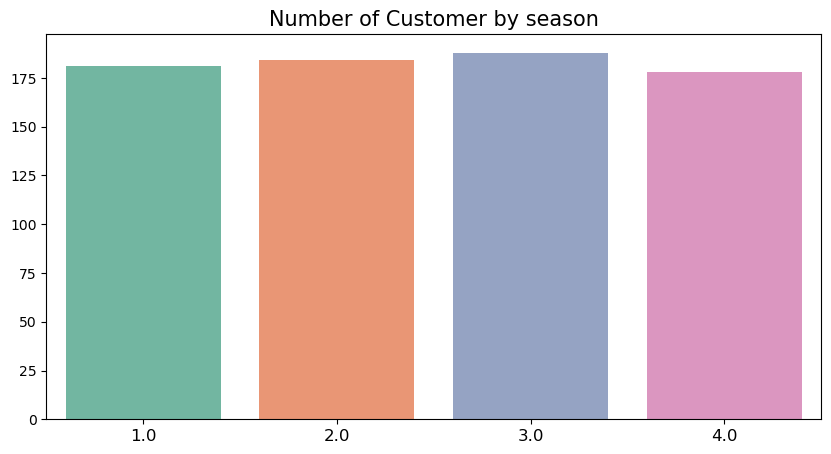

In [40]:
colors = sns.color_palette("Set2")
byseason_df = hours_days_df.groupby(by="season_y").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="season_y",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna yang paling banyak pada kolom season_y terjadi pada season 3 yaitu pada musim gugur. dan pengguna terendah pada season 4 yaitu pada musim salju

Berdasarkan weathersit

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\849565359.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\849565359.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


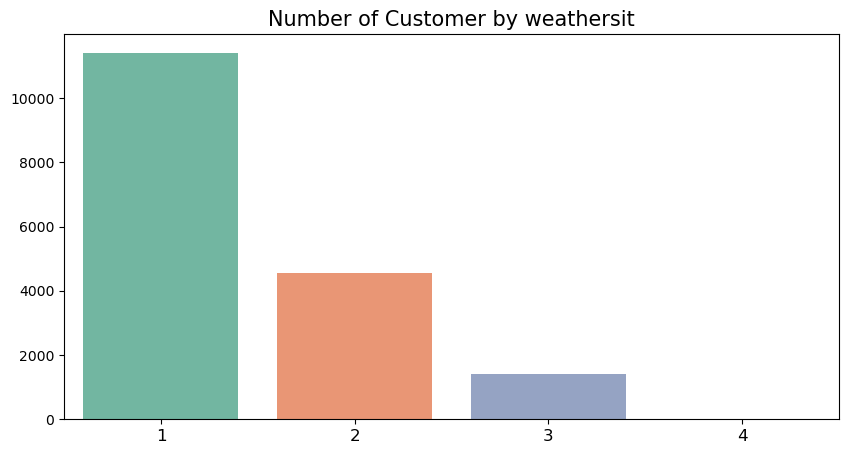

In [41]:
colors = sns.color_palette("Set2")
byseason_df = hours_days_df.groupby(by="weathersit_x").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weathersit_x",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna yang paling banyak pada kolom weathersit_x terjadi pada weathersit 1 yaitu pada cuaca cerah, sedikit berawan, dam berawan sebagian. dan pengguna terendah pada weathersit 4 yaitu pada cuaca hujan lebat + esbatu + badai petir + kabut, salju + kabut

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1067962430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1067962430.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(


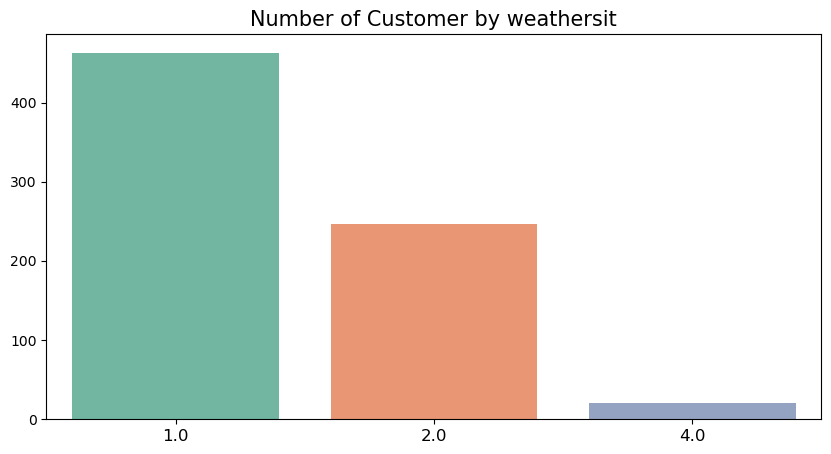

In [42]:
colors = sns.color_palette("Set2")
byseason_df = hours_days_df.groupby(by="weathersit_y").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weathersit_y",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Pengguna yang paling banyak pada kolom weathersit_y terjadi pada weathersit 1 yaitu pada cuaca cerah, sedikit berawan, dam berawan sebagian. dan pada weathersit 3 tidak terdapat pengguna yang melakukan bike-sharing rental.

# Pertanyan 3 : Pengguna apa yang paling banyak dan paling sedikit masuk di indeks record?

In [43]:
sum_instant_df = hours_days_df.groupby("cnt_x").instant.sum().sort_values(ascending=False).reset_index()
sum_instant_df.head(15)

,cnt_x,instant
0,5,2127533
1,6,1974751
2,4,1736766
3,7,1597056
4,3,1575068
5,8,1555573
6,11,1381065
7,10,1377603
8,2,1325343
9,9,1182158


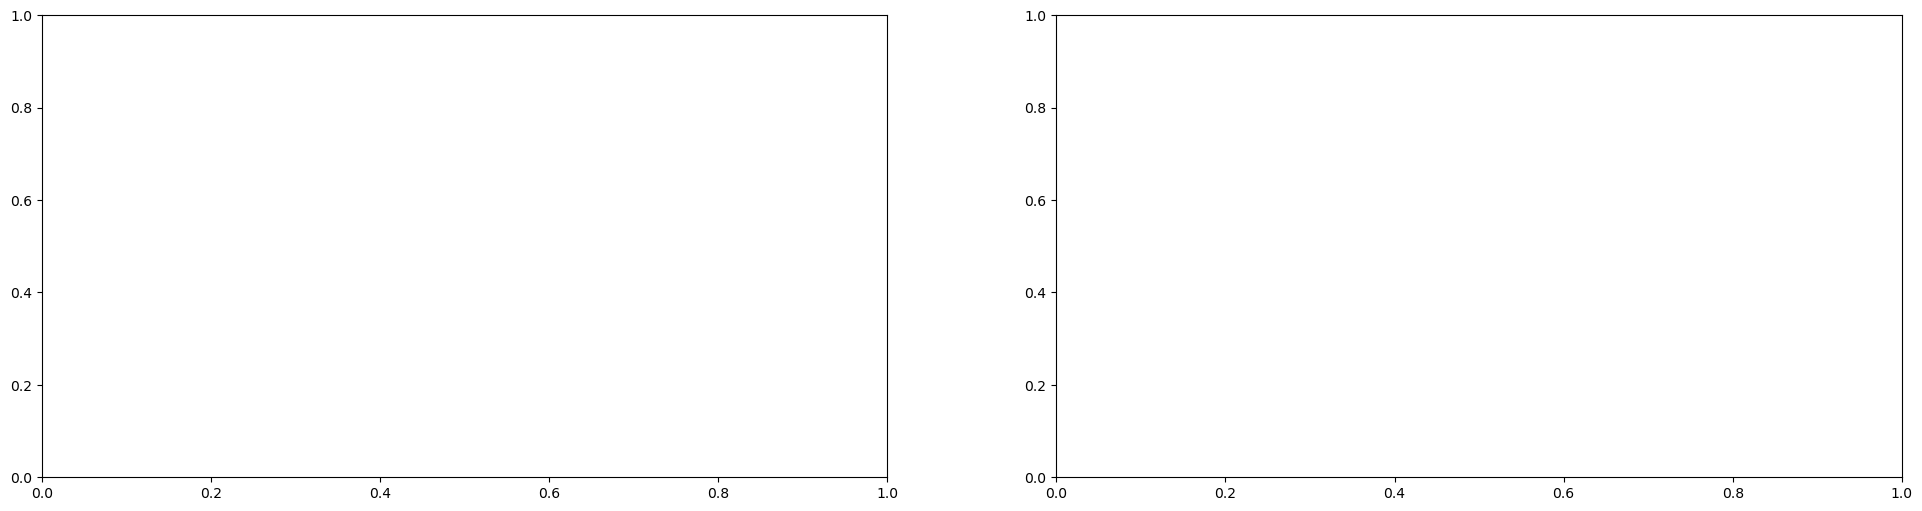

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1614583296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="instant", y="cnt_x", data=sum_instant_df.head(5), palette=colors, ax=ax[0])
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1614583296.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="instant", y="cnt_x", data=sum_instant_df.sort_values(by="cnt_x", ascending=True).head(5), palette=colors, ax=ax[1])


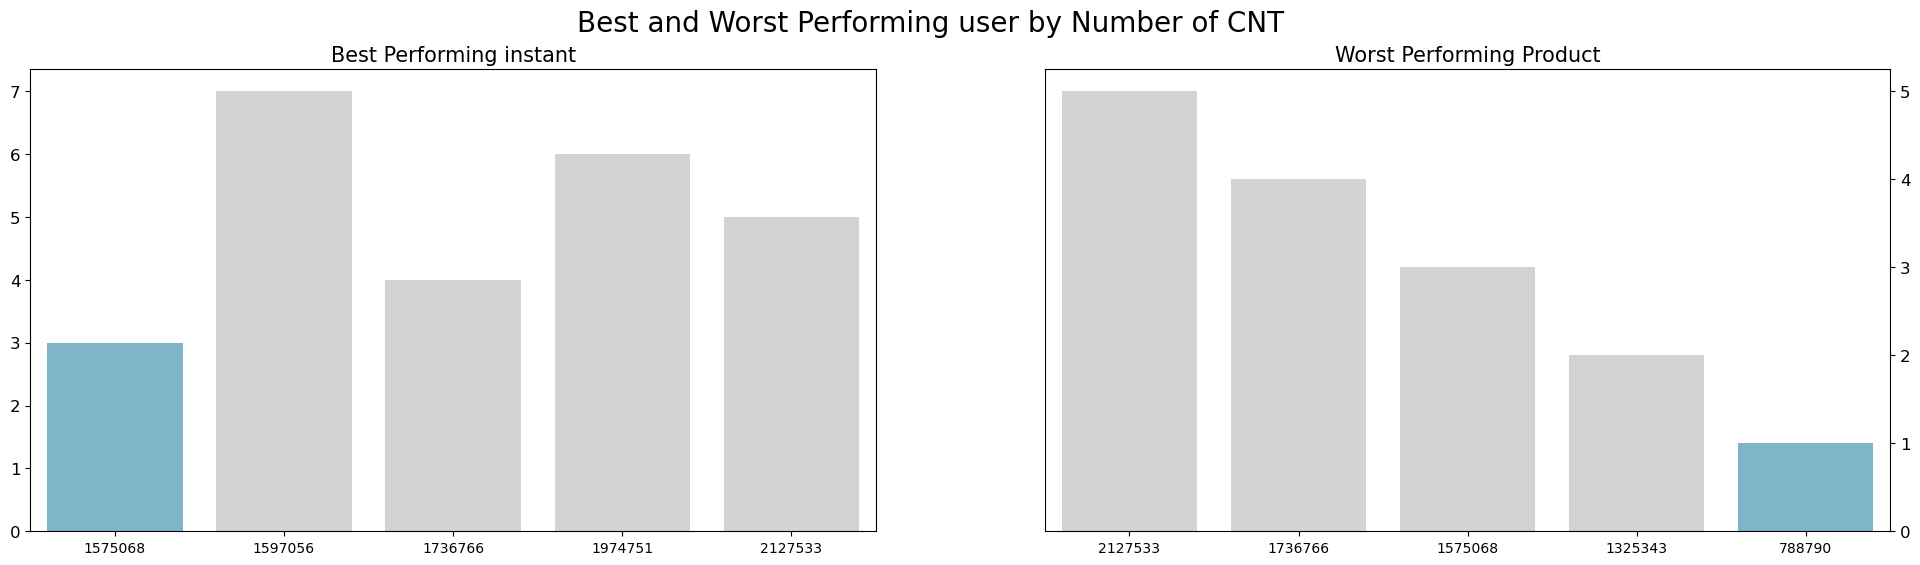

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="instant", y="cnt_x", data=sum_instant_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing instant", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="instant", y="cnt_x", data=sum_instant_df.sort_values(by="cnt_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing user by Number of CNT", fontsize=20)
plt.show()


Pengguna yang memberikan revenue terbaik yaitu dengan CNT 1575068, dan pengguna yang memberikan revenue terburuk yaitu dengan CNT 788790




In [46]:
sum_instant_df = hours_days_df.groupby("cnt_y").instant.sum().sort_values(ascending=False).reset_index()
sum_instant_df.head(15)

,cnt_y,instant
0,6824.0,1242
1,7534.0,1241
2,4459.0,1235
3,5260.0,1207
4,6536.0,1192
5,5698.0,1139
6,5847.0,1110
7,6883.0,1082
8,6591.0,1079
9,2424.0,987


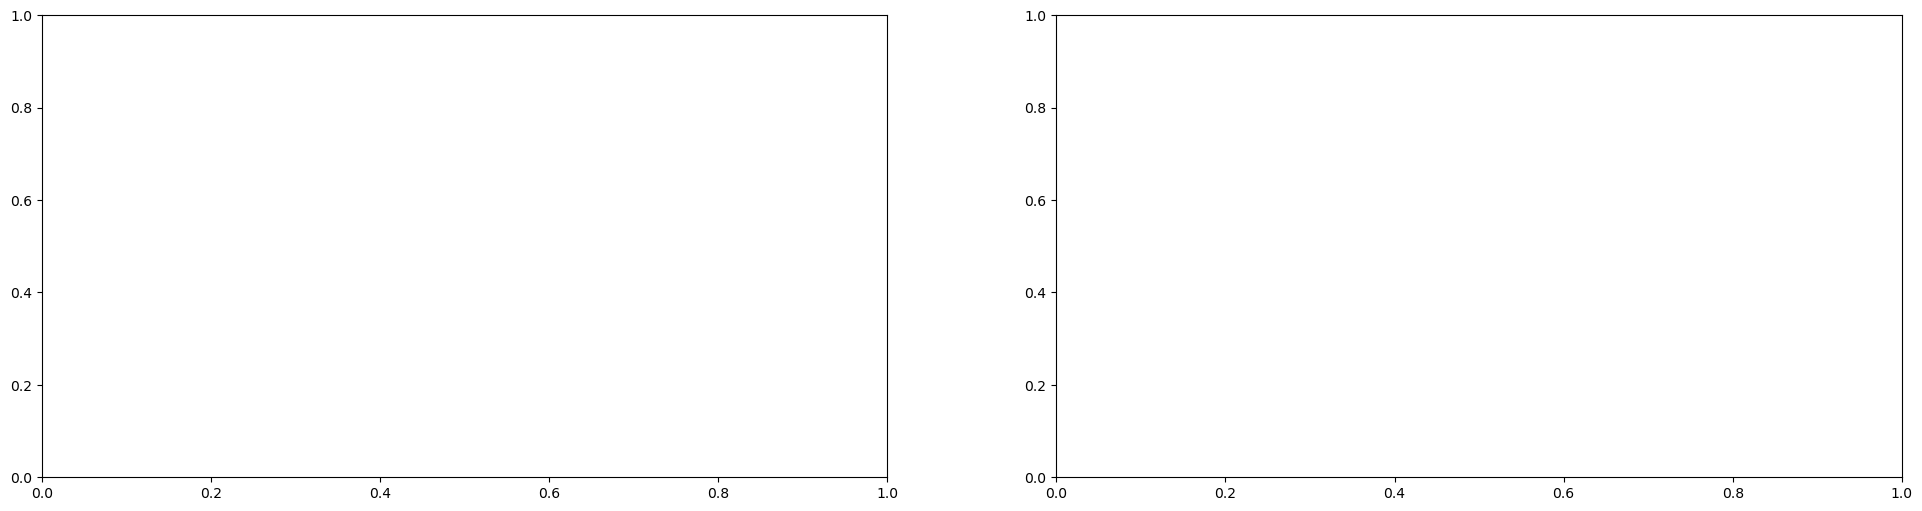

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1121573459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="instant", y="cnt_y", data=sum_instant_df.head(5), palette=colors, ax=ax[0])
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\1121573459.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="instant", y="cnt_y", data=sum_instant_df.sort_values(by="cnt_y", ascending=True).head(5), palette=colors, ax=ax[1])


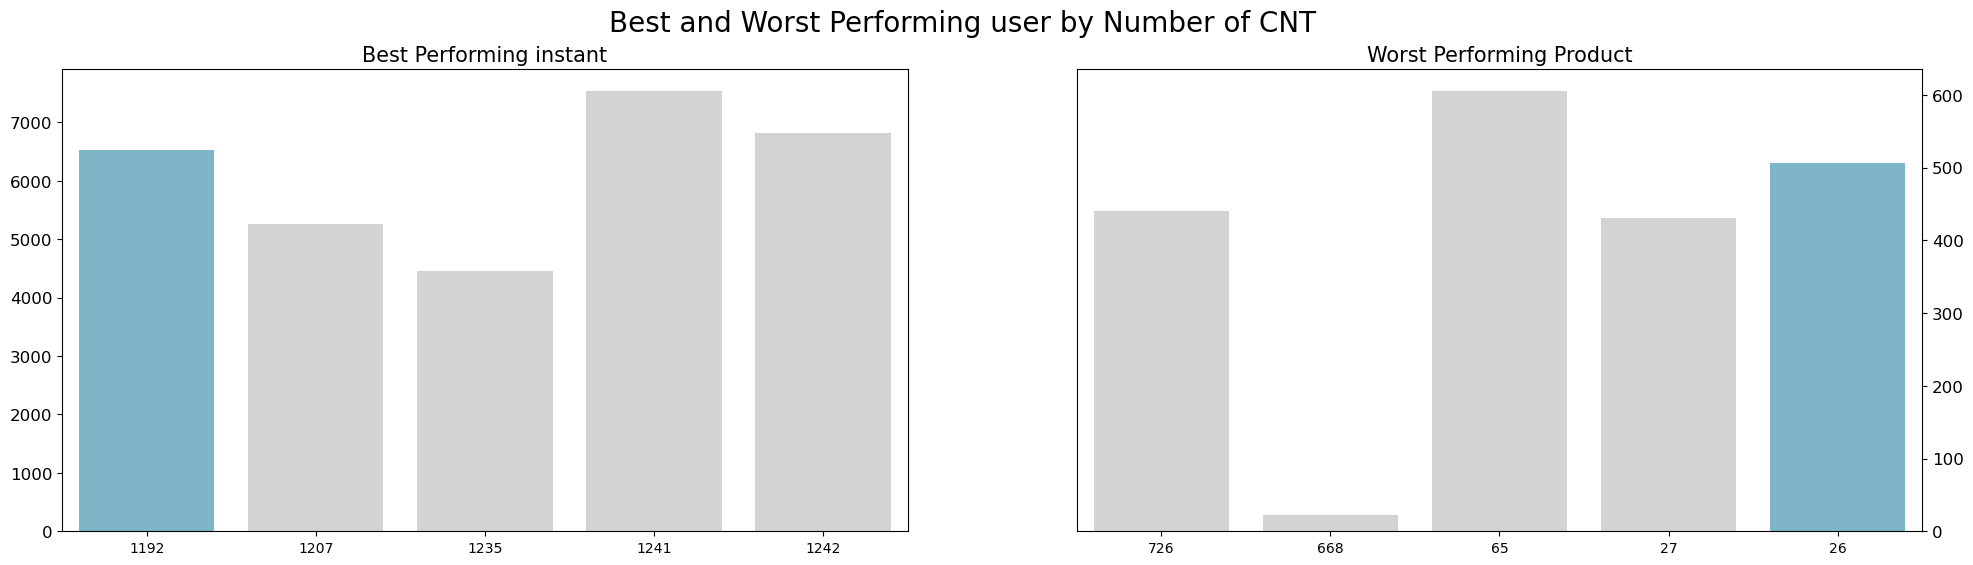

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="instant", y="cnt_y", data=sum_instant_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing instant", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="instant", y="cnt_y", data=sum_instant_df.sort_values(by="cnt_y", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing user by Number of CNT", fontsize=20)
plt.show()

Pengguna yang memberikan revenue terbaik yaitu dengan CNT 1192, dan pengguna yang mmeberikan revenue terburuk yaitu dengan CNT 26

## RFM Analysis

In [49]:
rfm_df = hours_days_df.groupby(by="instant", as_index=False).agg({
    "dteday_x": "max",
    "registered_x": "nunique",
    "cnt_x": "sum"
})
rfm_df.columns = ["instant", "windspeed_x", "atemp_x", "hum_x"]

rfm_df["windspeed_x"] = rfm_df["windspeed_x"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["windspeed_x"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("windspeed_x", axis=1, inplace=True)
rfm_df.head()

,instant,atemp_x,hum_x,recency
0,1,1,16,730
1,2,1,40,730
2,3,1,32,730
3,4,1,13,730
4,5,1,1,730


C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2510571325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2510571325.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="atemp_x", x="instant", data=rfm_df.sort_values(by="atemp_x", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Benny\AppData\Local\Temp\ipykernel_10172\2510571325.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

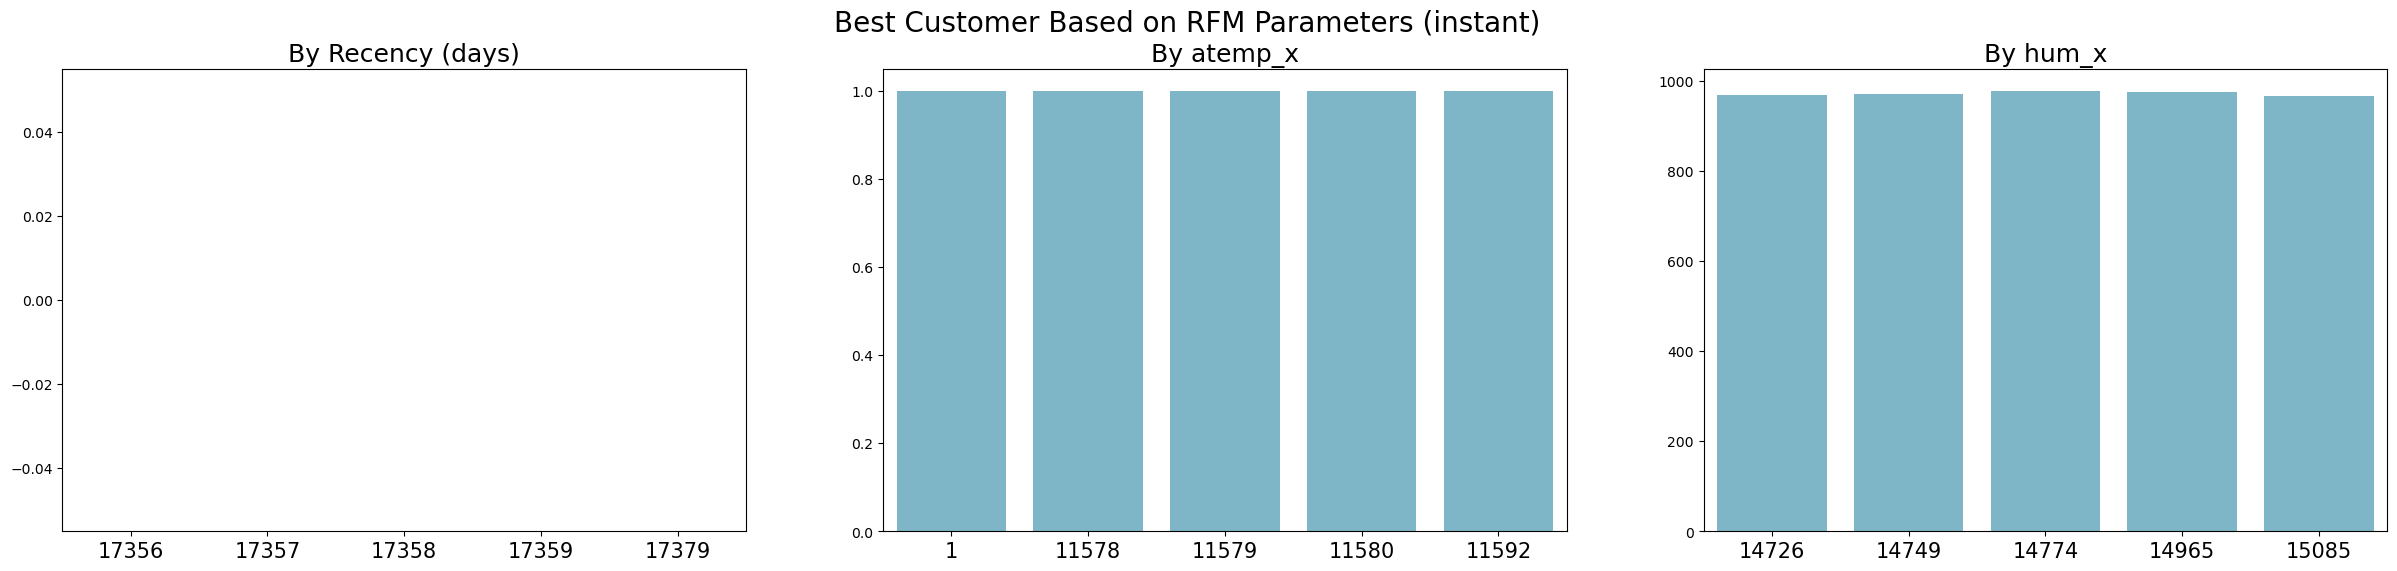

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="atemp_x", x="instant", data=rfm_df.sort_values(by="atemp_x", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By atemp_x", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="hum_x", x="instant", data=rfm_df.sort_values(by="hum_x", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By hum_x", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Berdasarkan season, diketahui bahwa pada bulan maret, juni, september, dan desember terjadi kenaikan mencapai 2.0, dan pada bulan april, juli, dan oktober terjadi penurunan mencapai 1.0 sehingga performa pengguna berpengaruh akibat adanya season.  
- Conclution pertanyaan 2

Berdasarkan season, pengguna yang paling banyak pada kolom season_x dan season_y terjadi pada season 3 yaitu pada musim gugur. dan pengguna terendah pada season 4 yaitu pada musim salju.

Berdasarkan weathersit, Pengguna yang paling banyak pada kolom weathersit_x terjadi pada weathersit 1 yaitu pada cuaca cerah, sedikit berawan, dam berawan sebagian. dan pengguna terendah pada weathersit 4 yaitu pada cuaca hujan lebat + esbatu + badai petir + kabut, salju + kabut. Sedangkan pengguna yang paling banyak pada kolom weathersit_y terjadi pada weathersit 1 yaitu pada cuaca cerah, sedikit berawan, dam berawan sebagian. dan pada weathersit 3 tidak terdapat pengguna yang melakukan bike-sharing rental.

- Conclution pertanyaan 3

Pada cnt_x, Pengguna yang memberikan revenue terbaik yaitu dengan CNT 1575068, dan pengguna yang memberikan revenue terburuk yaitu dengan CNT 788790. Sedangkan pada cnt_y, Pengguna yang memberikan revenue terbaik yaitu dengan CNT 1192, dan pengguna yang mmeberikan revenue terburuk yaitu dengan CNT 26

- Conclution pertanyaan 4
Pada beberapa bulan terakhir sekitar oktober, november, desember pengguna bike-sharing rental cukup mengalami penurunan

- Conclution pertanyaan 5

Pengguna cnt dengan jumlah pengguna maksimal yaitu sebesar 8714.
